In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import ast
import pathlib
import os
import ujson as json
from sklearn.metrics import accuracy_score, average_precision_score, recall_score, confusion_matrix
from IPython import display
from diagrams import Diagram, Node, Edge, Cluster
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB

In [2]:
allPerfDf = pd.read_csv("/home/alextay96/Desktop/new_workspace/DLDataPipeline/tmp/models_43_perf.csv")
allPerfDf = allPerfDf.round(decimals=2)


In [3]:
def genAgg(evalDf, colName, metric):
    avgAcc = evalDf.groupby(["part"])[colName].mean().reset_index()
    minAcc = evalDf.groupby(["part"])[colName].min().reset_index().rename(columns={colName : f"min_{metric}"})
    maxAcc = evalDf.groupby(["part"])[colName].max().reset_index().rename(columns={colName : f"max_{metric}"})
    # print(colName)
    tempDf = avgAcc.merge(minAcc, on="part")
    tempDf = tempDf.merge(maxAcc, on="part")
    return tempDf

In [4]:
def vis(tempDf1,metricName, metric , viewName):
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=tempDf1["part"], y=tempDf1[metricName],
        text = tempDf1[metricName],

        error_y=dict( 
                    type='data',
                    symmetric=False,
                    array=tempDf1[f"max_{metric}"] - tempDf1[metricName],
                    arrayminus=tempDf1[metricName] - tempDf1[f"min_{metric}"]
    )))
    avgVal = tempDf1[metricName].mean().item()
    fig.add_hline(y=avgVal, line_width=2, line_color="red")
    # print(avgVal)
    fig.update_layout(
        yaxis = dict(
            tickmode = 'array',
            tickvals = [np.format_float_positional(avgVal, 2), 0.2, 0.5],
        )
    )
    fig.update_layout(
        title=go.layout.Title(
            text=f"{viewName}_{metricName}",
            x=0.5
        ))
    return fig

In [5]:
with open("../data/angle.json", "r") as f:
    anglePartMap = json.load(f)

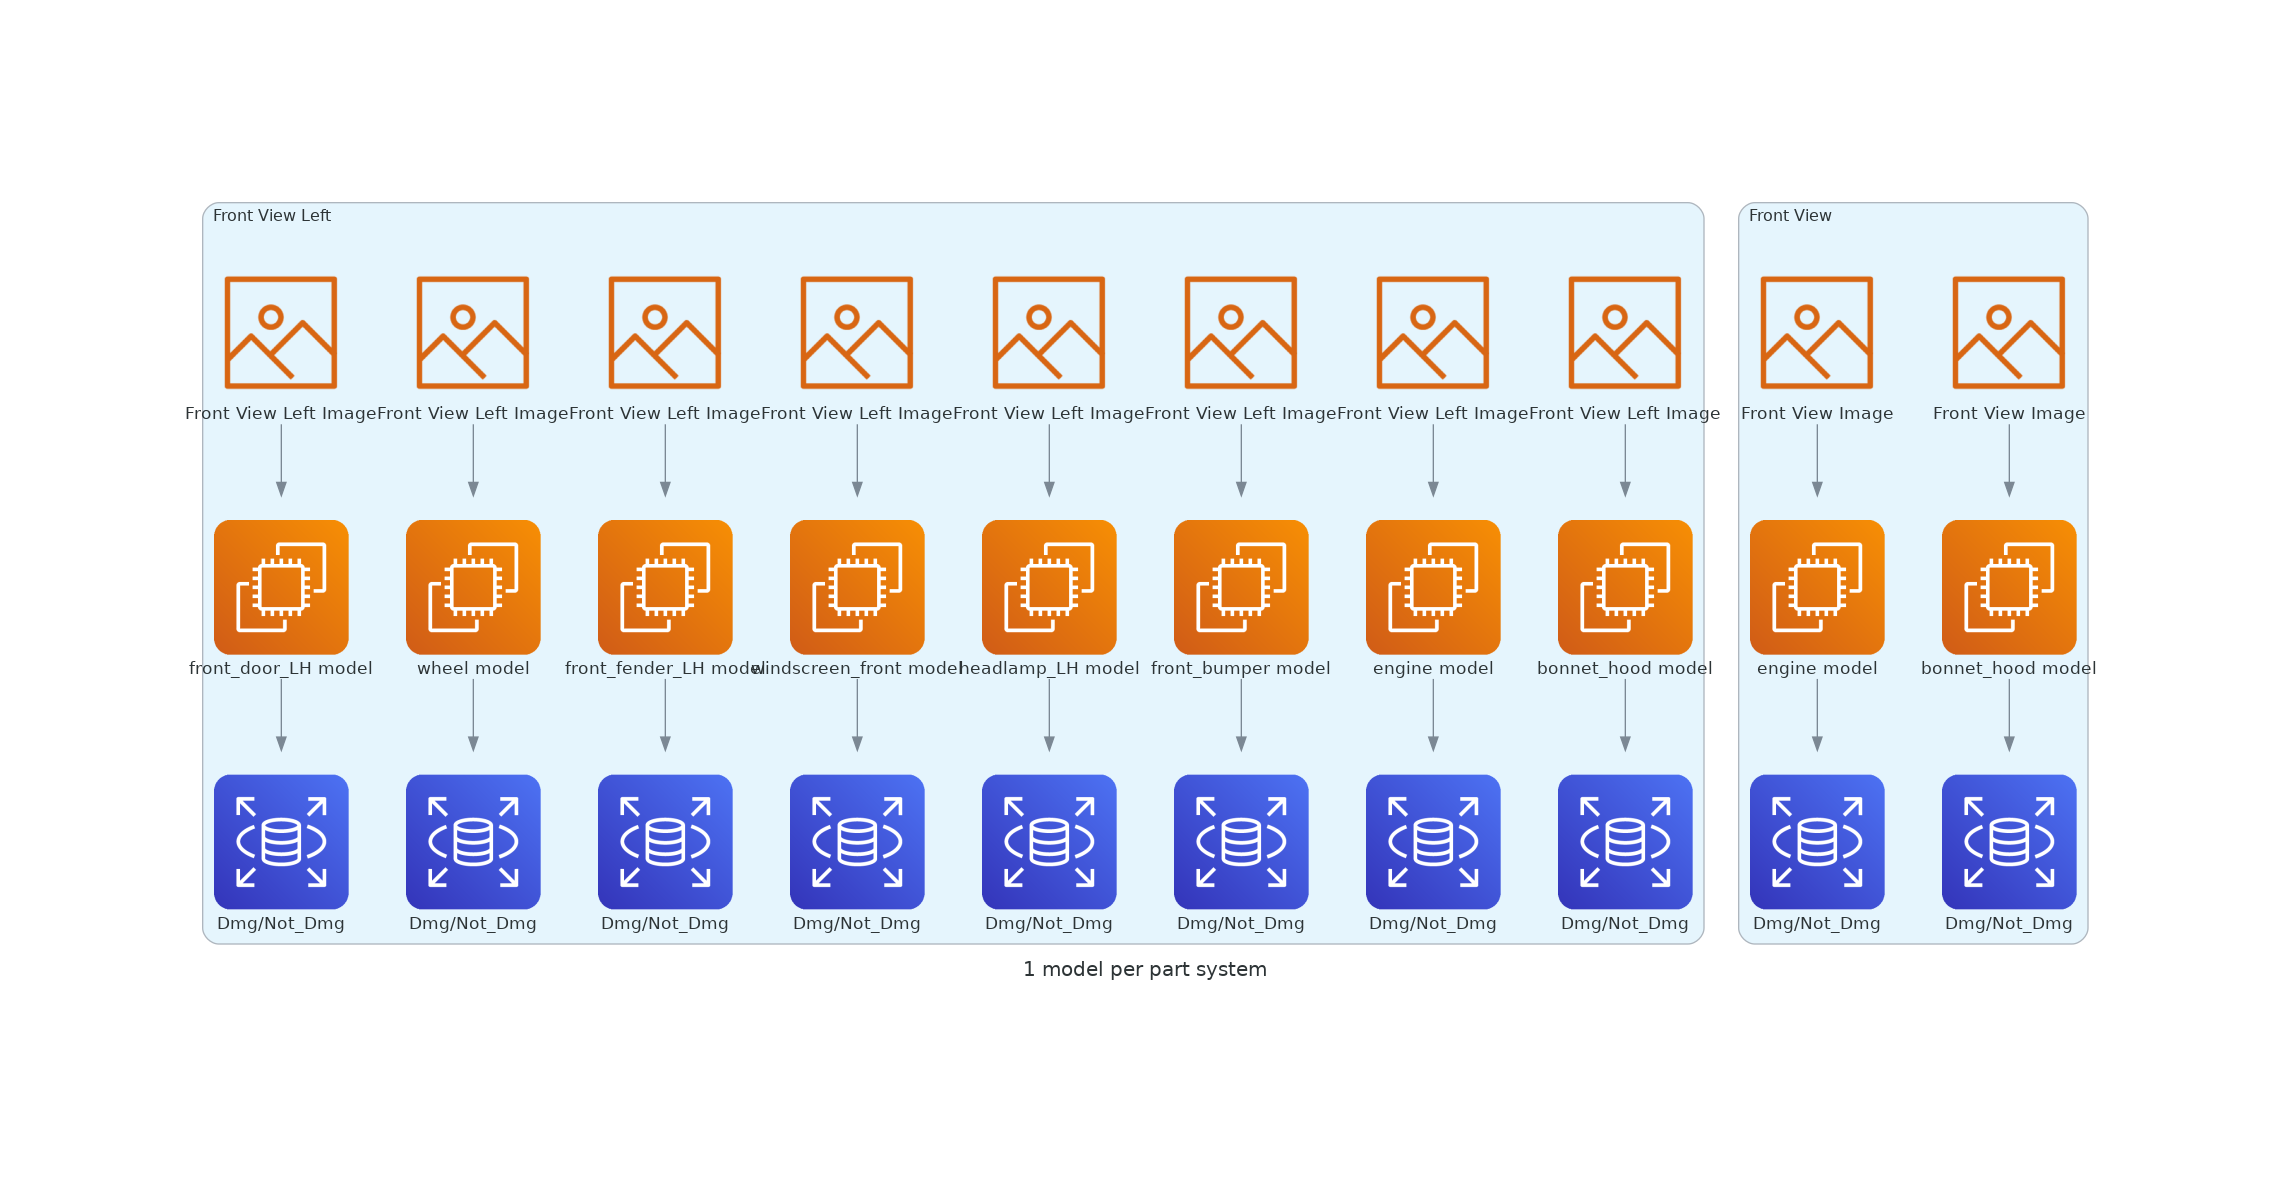

In [149]:
from diagrams.aws.compute import EC2ContainerRegistryImage
visCount = 0
with Diagram(name="1 model per part system", show=False, direction="TB") as fig:
    # Node("aa") >> Node("nn")
    for view, parts in anglePartMap.items():
        with Cluster(label=view) as c1:
            for part in parts:
                visCount += 1
                if(visCount > 5):
                    break
                EC2ContainerRegistryImage(f"{view} Image") >> EC2(f"{part} model") >> RDS("Dmg/Not_Dmg")
fig

In [150]:

metricName = "test_acc"
metric = metricName.split("_")[-1]
viewName = "Front View"
df = allPerfDf[allPerfDf["view"] == viewName]
testAccDf = genAgg(df, metricName, metric)
accFig1 = vis(testAccDf, metricName, metric, viewName)
# accFig1.show()

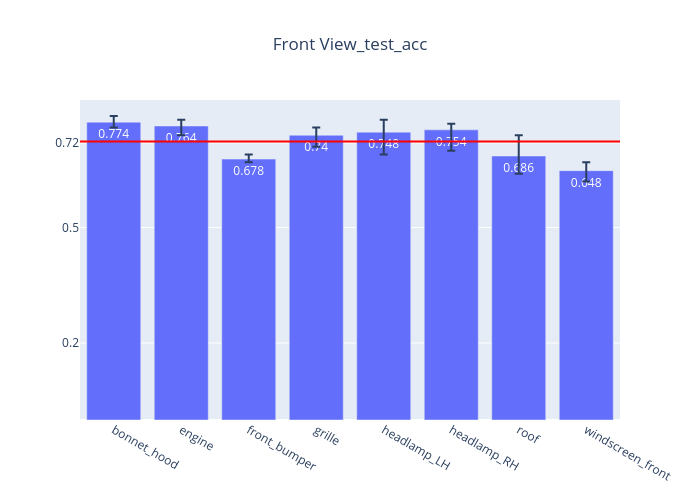

In [151]:
#| label: Front View Parts Acc
#| fig-cap: "Front View Parts Acc"
img_bytes = accFig1.to_image(format="png")
display.Image(img_bytes)

In [152]:
metricName = "test_acc"
metric = metricName.split("_")[-1]
viewName = "Front View Left"
df = allPerfDf[allPerfDf["view"] == viewName]
testAccDf = genAgg(df, metricName, metric)
accFig1 = vis(testAccDf, metricName, metric, viewName)
# accFig1.show()

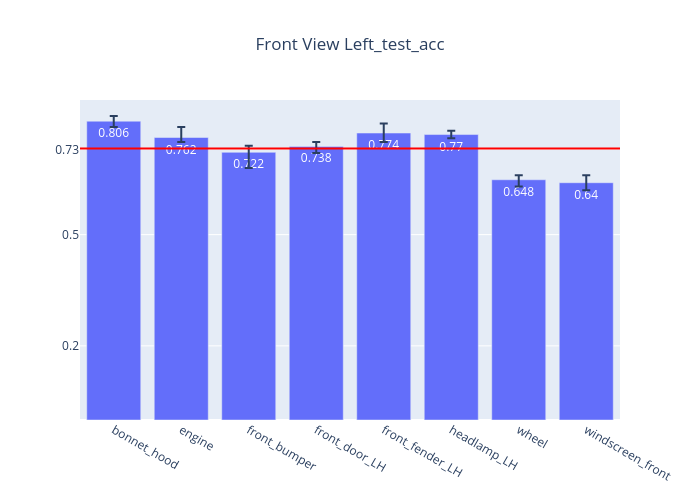

In [153]:
#| label: Front View Left Parts Acc
#| fig-cap: "Front View Left Parts Acc"
img_bytes = accFig1.to_image(format="png")
display.Image(img_bytes)

In [154]:
metricName = "test_acc"
metric = metricName.split("_")[-1]
viewName = "Front View Right"
df = allPerfDf[allPerfDf["view"] == viewName]
testAccDf = genAgg(df, metricName, metric)
accFig1 = vis(testAccDf, metricName, metric, viewName)
# accFig1.show()

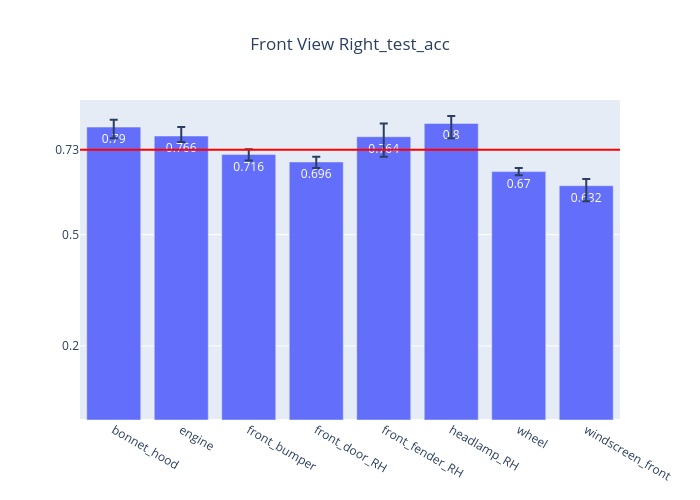

In [155]:
#| label: Front View Right Parts Acc
#| fig-cap: "Front View Right Parts Acc"
img_bytes = accFig1.to_image(format="png")
display.Image(img_bytes)

In [156]:
metricName = "test_acc"
metric = metricName.split("_")[-1]
viewName = "Rear View"
df = allPerfDf[allPerfDf["view"] == viewName]
testAccDf = genAgg(df, metricName, metric)
accFig1 = vis(testAccDf, metricName, metric, viewName)
# accFig1.show()

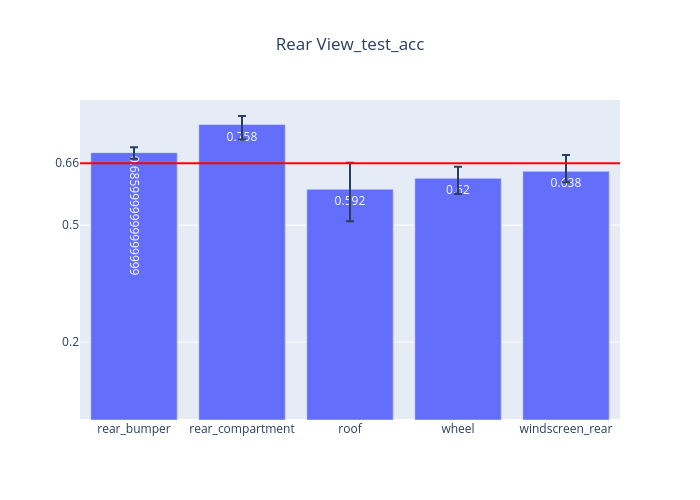

In [157]:
#| label: Rear View Parts Acc
#| fig-cap: "Rear View Parts Acc"
img_bytes = accFig1.to_image(format="png")
display.Image(img_bytes)

In [158]:
metricName = "test_acc"
metric = metricName.split("_")[-1]
viewName = "Rear View Left"
df = allPerfDf[allPerfDf["view"] == viewName]
testAccDf = genAgg(df, metricName, metric)
accFig1 = vis(testAccDf, metricName, metric, viewName)
# accFig1.show()

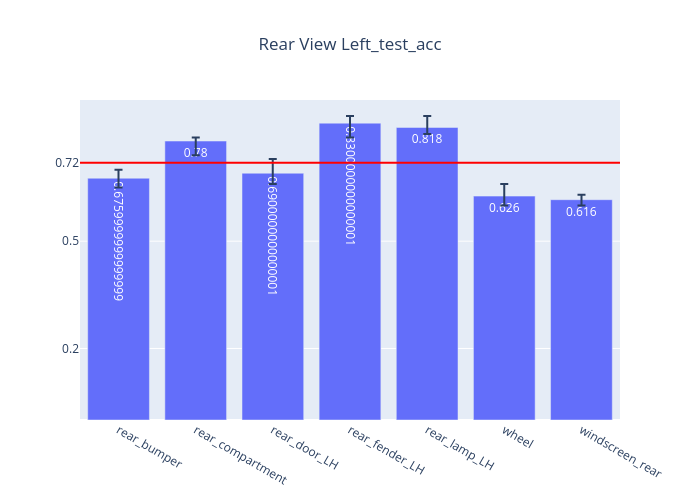

In [159]:
#| label: Rear View Left Parts Acc
#| fig-cap: "Rear View Left Parts Acc"
img_bytes = accFig1.to_image(format="png")
display.Image(img_bytes)

In [160]:
metricName = "test_acc"
metric = metricName.split("_")[-1]
viewName = "Rear View Right"
df = allPerfDf[allPerfDf["view"] == viewName]
testAccDf = genAgg(df, metricName, metric)
accFig1 = vis(testAccDf, metricName, metric, viewName)
# accFig1.show()

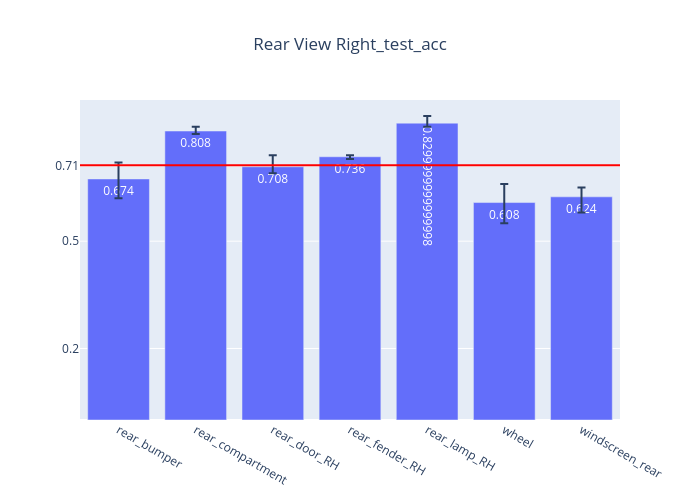

In [161]:
#| label: Rear View Right Parts Acc
#| fig-cap: "Rear View Right Parts Acc"
img_bytes = accFig1.to_image(format="png")
display.Image(img_bytes)

In [162]:
metricName = "test_tp"
metric = metricName.split("_")[-1]
viewName = "Front View"
df = allPerfDf[allPerfDf["view"] == viewName]
testAccDf = genAgg(df, metricName, metric)
accFig1 = vis(testAccDf, metricName, metric, viewName)
# accFig1.show()

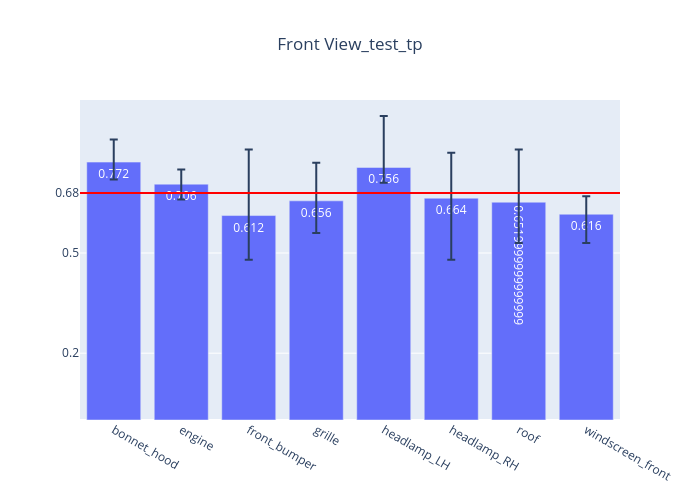

In [163]:
#| label: Front View TP Acc
#| fig-cap: "Front View Parts TP"
img_bytes = accFig1.to_image(format="png")
display.Image(img_bytes)

In [164]:
metricName = "test_tp"
metric = metricName.split("_")[-1]
viewName = "Front View Left"
df = allPerfDf[allPerfDf["view"] == viewName]
testAccDf = genAgg(df, metricName, metric)
accFig1 = vis(testAccDf, metricName, metric, viewName)
# accFig1.show()

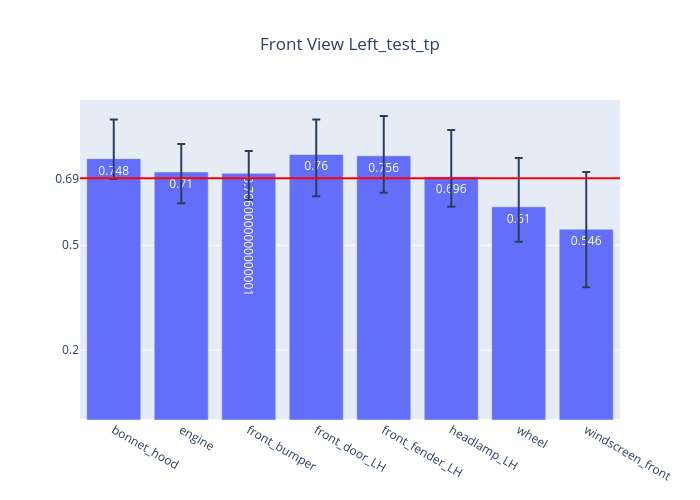

In [165]:
#| label: Front View Left TP Acc
#| fig-cap: "Front View Left Parts TP"
img_bytes = accFig1.to_image(format="png")
display.Image(img_bytes)

In [166]:
metricName = "test_tp"
metric = metricName.split("_")[-1]
viewName = "Front View Right"
df = allPerfDf[allPerfDf["view"] == viewName]
testAccDf = genAgg(df, metricName, metric)
accFig1 = vis(testAccDf, metricName, metric, viewName)
# accFig1.show()

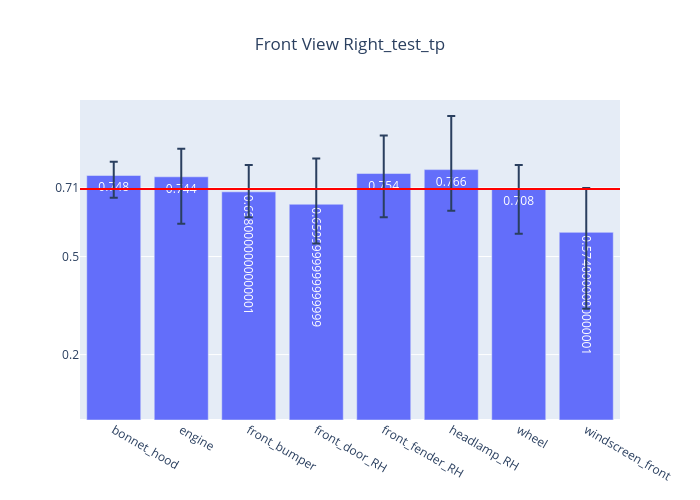

In [167]:
#| label: Front View Right TP Acc
#| fig-cap: "Front View Right Parts TP"
img_bytes = accFig1.to_image(format="png")
display.Image(img_bytes)

In [168]:
metricName = "test_tp"
metric = metricName.split("_")[-1]
viewName = "Rear View"
df = allPerfDf[allPerfDf["view"] == viewName]
testAccDf = genAgg(df, metricName, metric)
accFig1 = vis(testAccDf, metricName, metric, viewName)
# accFig1.show()

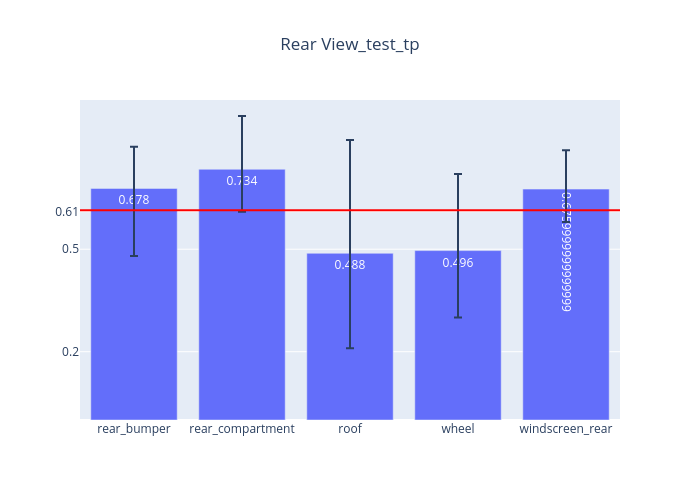

In [169]:
#| label: Rear View TP Acc
#| fig-cap: "Rear View Parts TP"
img_bytes = accFig1.to_image(format="png")
display.Image(img_bytes)

In [170]:
metricName = "test_tp"
metric = metricName.split("_")[-1]
viewName = "Rear View Left"
df = allPerfDf[allPerfDf["view"] == viewName]
testAccDf = genAgg(df, metricName, metric)
accFig1 = vis(testAccDf, metricName, metric, viewName)
# accFig1.show()

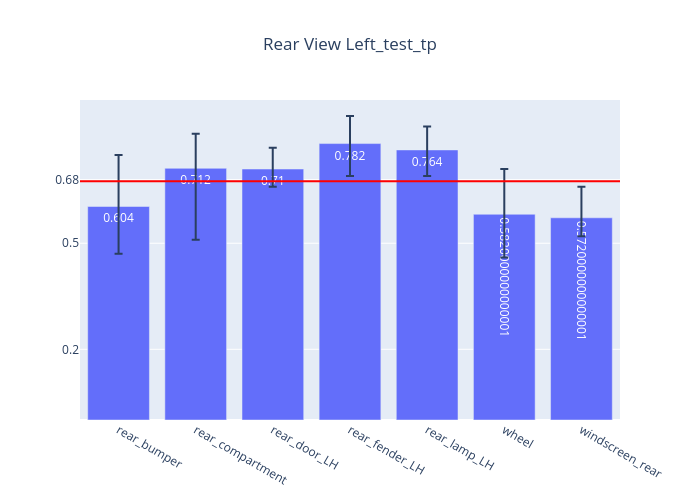

In [171]:
#| label: Rear View Left TP Acc
#| fig-cap: "Rear View Left Parts TP"
img_bytes = accFig1.to_image(format="png")
display.Image(img_bytes)

In [172]:
metricName = "test_tp"
metric = metricName.split("_")[-1]
viewName = "Rear View Right"
df = allPerfDf[allPerfDf["view"] == viewName]
testAccDf = genAgg(df, metricName, metric)
accFig1 = vis(testAccDf, metricName, metric, viewName)
# accFig1.show()

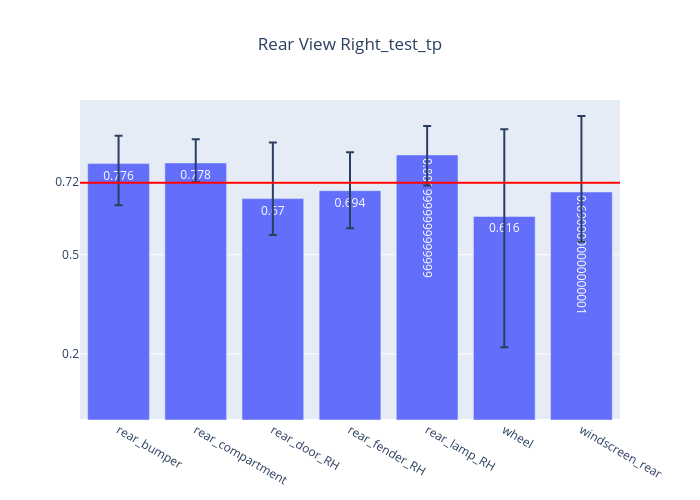

In [173]:
#| label: Rear View Right Left TP Acc
#| fig-cap: "Rear View Right Parts TP"
img_bytes = accFig1.to_image(format="png")
display.Image(img_bytes)

In [174]:
metricName = "test_tn"
metric = metricName.split("_")[-1]
viewName = "Front View"
df = allPerfDf[allPerfDf["view"] == viewName]
testAccDf = genAgg(df, metricName, metric)
accFig1 = vis(testAccDf, metricName, metric, viewName)
# accFig1.show()

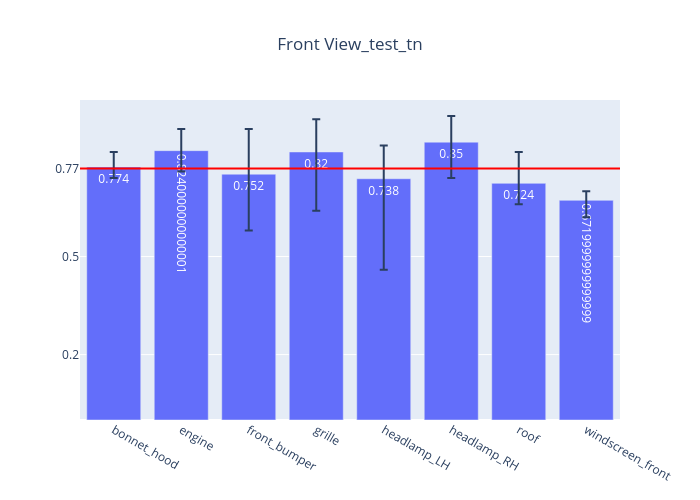

In [175]:
#| label: Front View True Negative
#| fig-cap: "Front View Parts True Negative"
img_bytes = accFig1.to_image(format="png")
display.Image(img_bytes)

In [176]:
metricName = "test_tn"
metric = metricName.split("_")[-1]
viewName = "Front View Left"
df = allPerfDf[allPerfDf["view"] == viewName]
testAccDf = genAgg(df, metricName, metric)
accFig1 = vis(testAccDf, metricName, metric, viewName)
# accFig1.show()

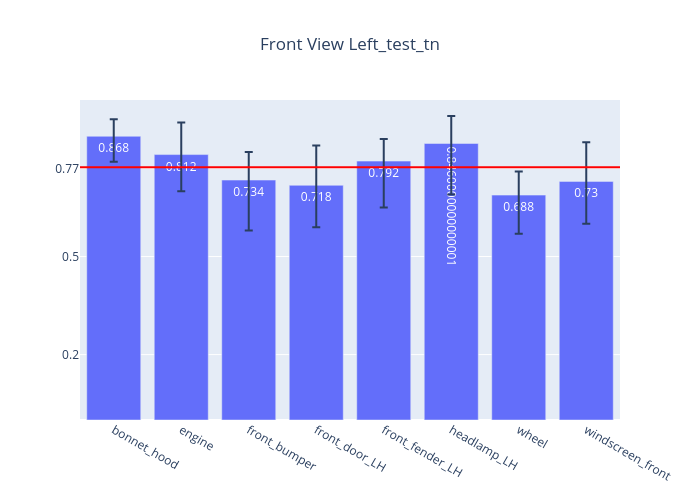

In [177]:
#| label: Front View Left True Negative
#| fig-cap: "Front View Left Parts True Negative"
img_bytes = accFig1.to_image(format="png")
display.Image(img_bytes)

In [178]:
metricName = "test_tn"
metric = metricName.split("_")[-1]
viewName = "Front View Right"
df = allPerfDf[allPerfDf["view"] == viewName]
testAccDf = genAgg(df, metricName, metric)
accFig1 = vis(testAccDf, metricName, metric, viewName)
# accFig1.show()

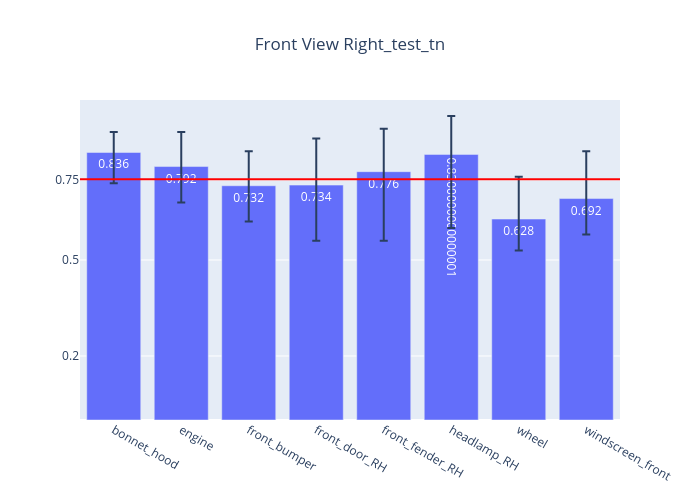

In [179]:
#| label: Front View Right True Negative
#| fig-cap: " Front View Right Parts True Negative"
img_bytes = accFig1.to_image(format="png")
display.Image(img_bytes)

In [180]:
metricName = "test_tn"
metric = metricName.split("_")[-1]
viewName = "Rear View"
df = allPerfDf[allPerfDf["view"] == viewName]
testAccDf = genAgg(df, metricName, metric)
accFig1 = vis(testAccDf, metricName, metric, viewName)
# accFig1.show()

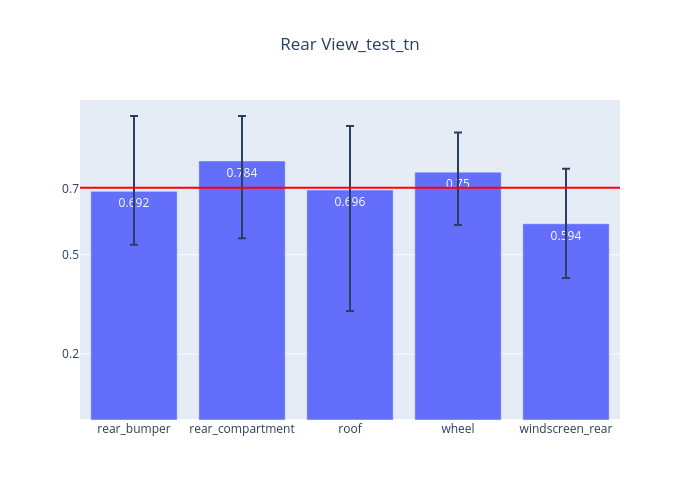

In [181]:
#| label: Rear View True Negative
#| fig-cap: "Rear View Parts True Negative"
img_bytes = accFig1.to_image(format="png")
display.Image(img_bytes)

In [182]:
metricName = "test_tn"
metric = metricName.split("_")[-1]
viewName = "Rear View Left"
df = allPerfDf[allPerfDf["view"] == viewName]
testAccDf = genAgg(df, metricName, metric)
accFig1 = vis(testAccDf, metricName, metric, viewName)
# accFig1.show()

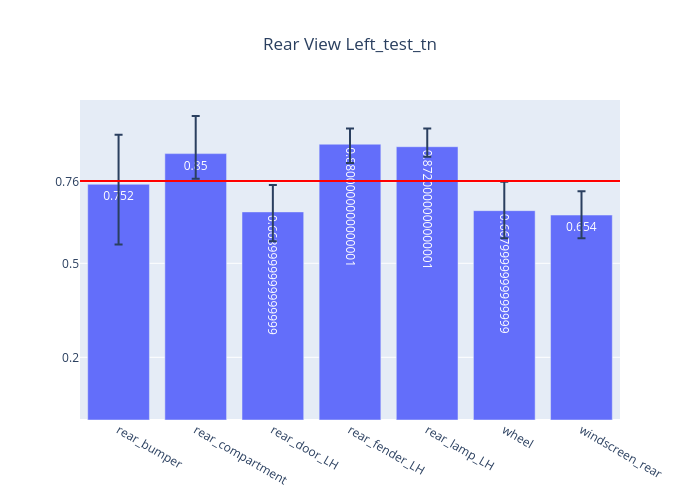

In [183]:
#| label: Rear View Left True Negative
#| fig-cap: "Rear View Left Parts True Negative"
img_bytes = accFig1.to_image(format="png")
display.Image(img_bytes)

In [184]:
metricName = "test_tn"
metric = metricName.split("_")[-1]
viewName = "Rear View Right"
df = allPerfDf[allPerfDf["view"] == viewName]
testAccDf = genAgg(df, metricName, metric)
accFig1 = vis(testAccDf, metricName, metric, viewName)
# accFig1.show()

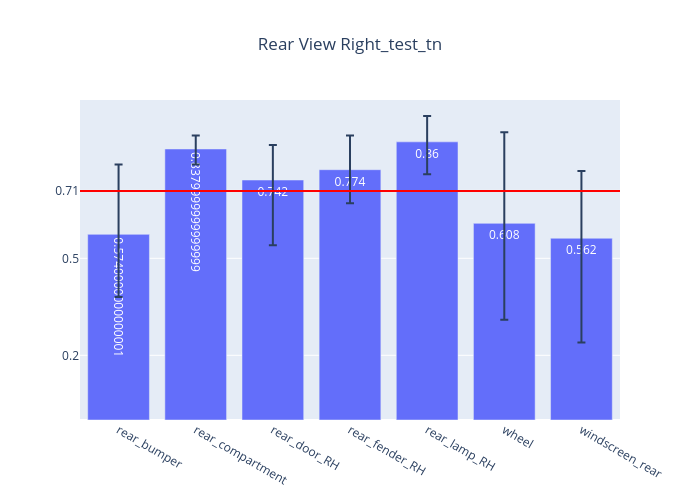

In [185]:
#| label: Rear View Right True Negative
#| fig-cap: "Rear View Right Parts True Negative"
img_bytes = accFig1.to_image(format="png")
display.Image(img_bytes)

In [186]:
caseEvalDf = pd.read_csv("/home/alextay96/Desktop/new_workspace/DLDataPipeline/tmp/complete_perf_by_case.csv"
                        )
avgSubsetAcc = caseEvalDf["caseAcc"].mean()
caseEvalDf["wrong_count"] = caseEvalDf["wrong_part"].apply(lambda x : len(ast.literal_eval(x)))
ThreeErrorCase = caseEvalDf[caseEvalDf["wrong_count"] <= 3]
threeCaseError = len(ThreeErrorCase) / len(caseEvalDf)
exactMatchAcc = len(caseEvalDf[caseEvalDf["wrong_count"] == 0]) / len(caseEvalDf)


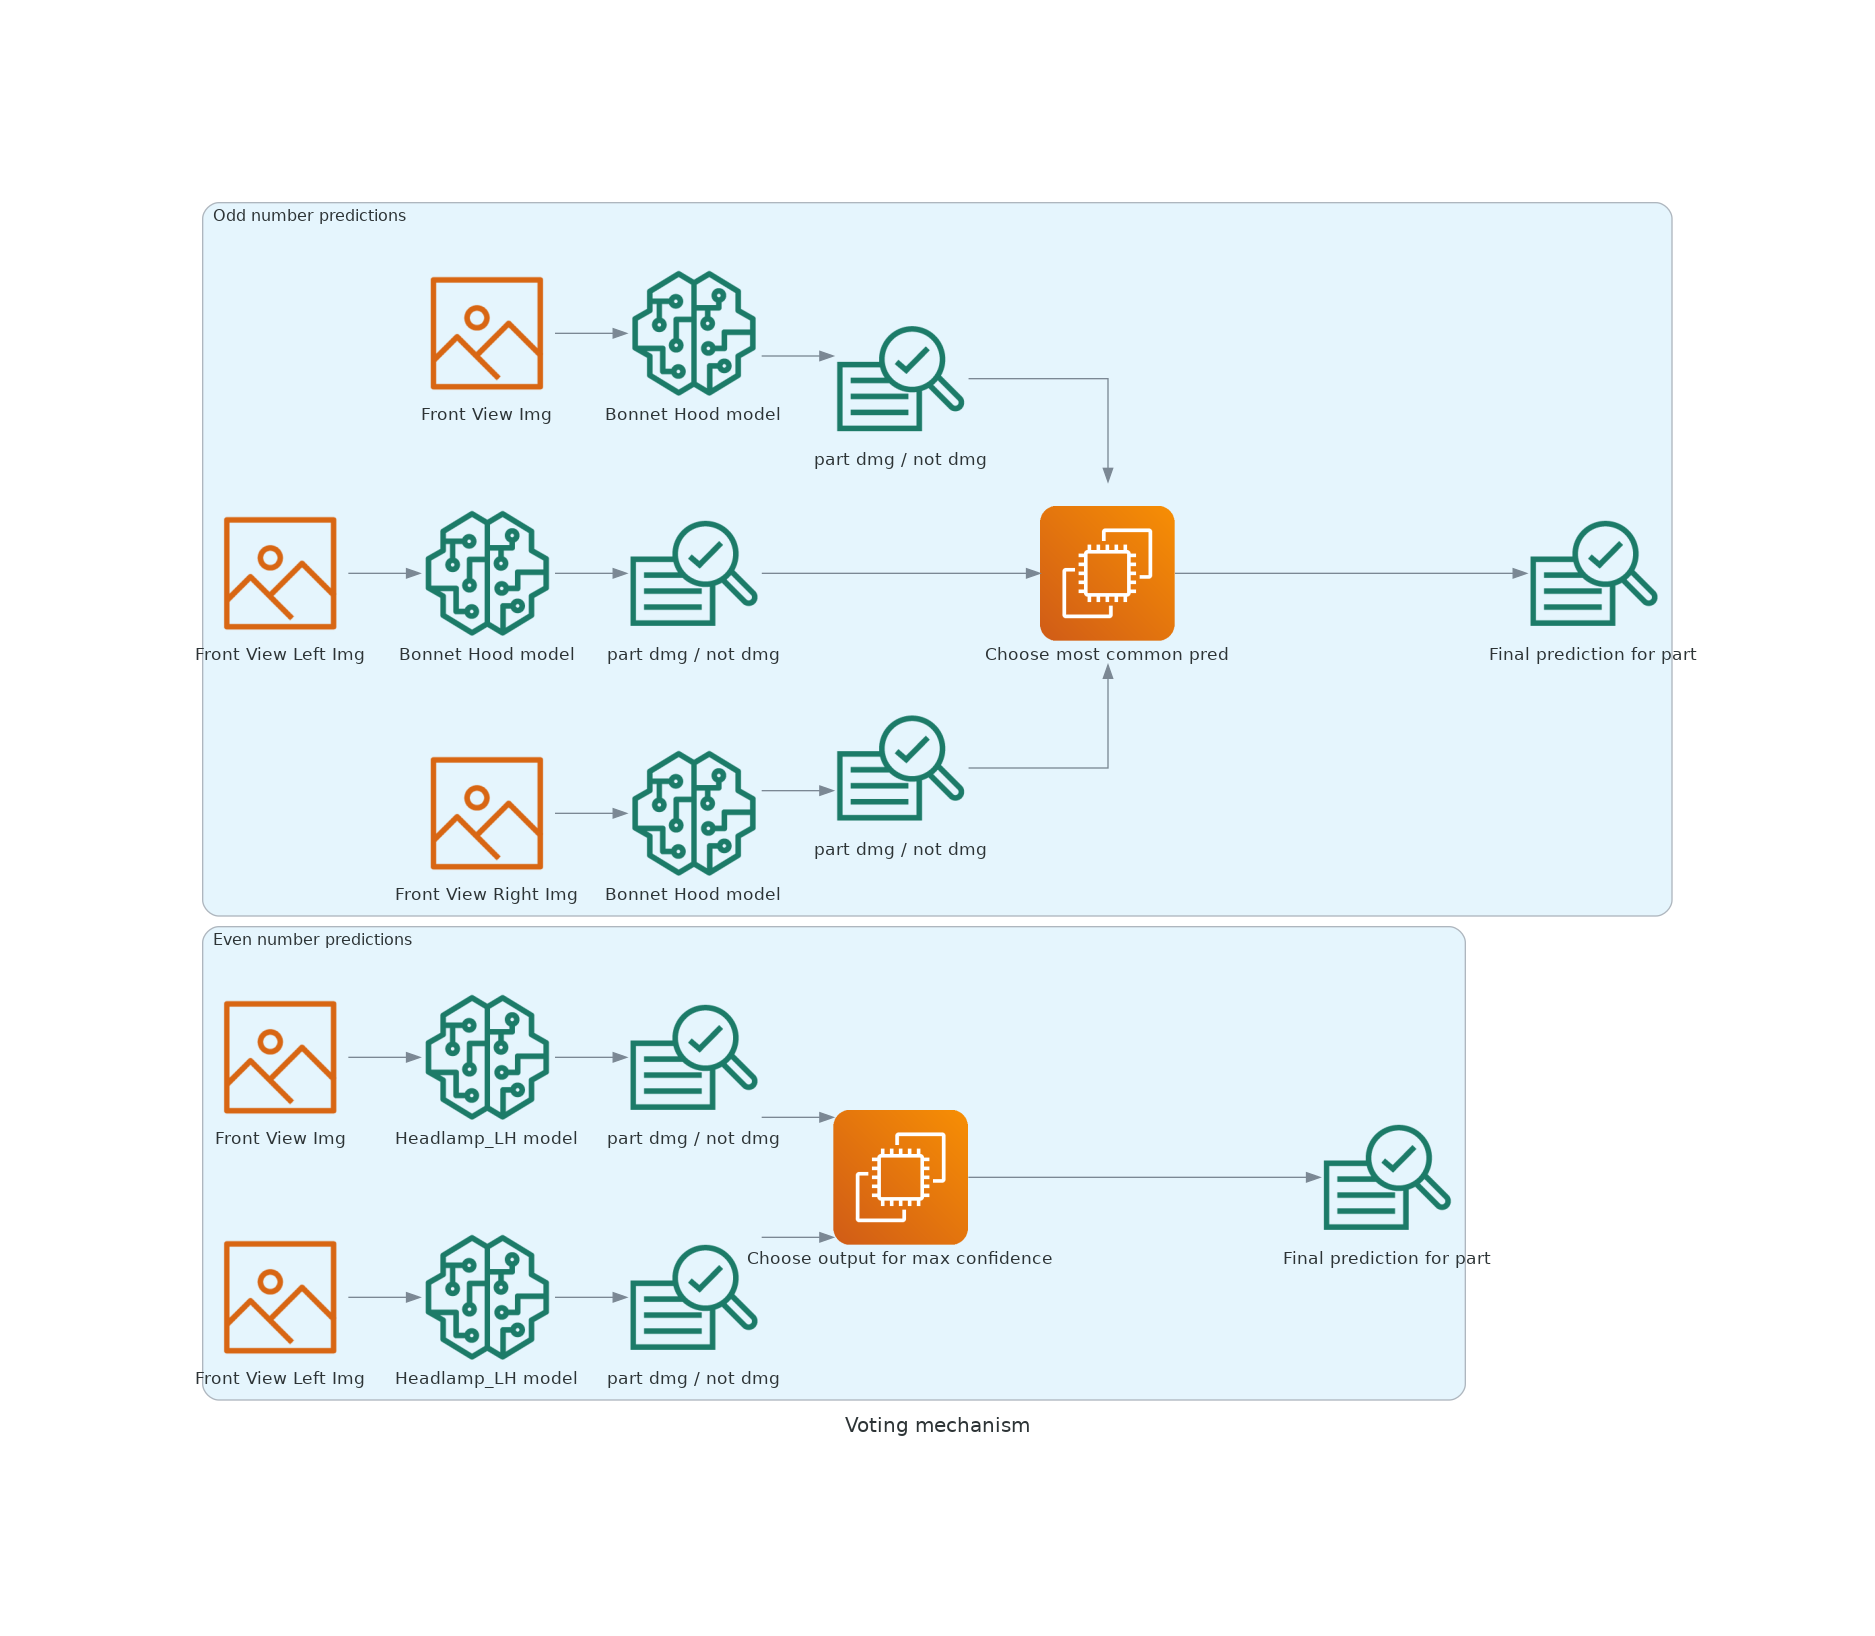

In [187]:
from diagrams.aws.compute import EC2ContainerRegistryImage
from diagrams.aws.ml import SagemakerModel, SagemakerTrainingJob


with Diagram(name="Voting mechanism", show=False, direction="LR") as fig:
    with Cluster(label="Even number predictions") as c1:
            input1 = EC2ContainerRegistryImage(f"Front View Img") 
            m1 = SagemakerModel("Headlamp_LH model")
            o1 = SagemakerTrainingJob("part dmg / not dmg")
            input2 = EC2ContainerRegistryImage(f"Front View Left Img") 
            m2 = SagemakerModel("Headlamp_LH model")
            o2 = SagemakerTrainingJob("part dmg / not dmg")
            EnsembleSys = EC2("Choose output for max confidence")
            finalOutput = SagemakerTrainingJob("Final prediction for part")

            input1 >> m1 >> o1 >>EnsembleSys
            input2 >> m2 >> o2 >>EnsembleSys
            EnsembleSys >>Edge(minlen="3") >> finalOutput
    with Cluster(label="Odd number predictions") as c1:
            input1 = EC2ContainerRegistryImage(f"Front View Img") 
            m1 = SagemakerModel("Bonnet Hood model")
            o1 = SagemakerTrainingJob("part dmg / not dmg")
            input2 = EC2ContainerRegistryImage(f"Front View Left Img") 
            m2 = SagemakerModel("Bonnet Hood model")
            o2 = SagemakerTrainingJob("part dmg / not dmg")
            input3 = EC2ContainerRegistryImage(f"Front View Right Img") 
            m3 = SagemakerModel("Bonnet Hood model")
            o3 = SagemakerTrainingJob("part dmg / not dmg")
            EnsembleSys = EC2("Choose most common pred")
            finalOutput = SagemakerTrainingJob("Final prediction for part")

            input1 >> m1 >> o1 >>EnsembleSys
            input2 >> m2 >> o2 >>Edge(minlen="2")>>EnsembleSys
            input3 >> m3 >> o3 >>EnsembleSys

            EnsembleSys >>Edge(minlen="3") >> finalOutput

fig

In [188]:
meanVal = caseEvalDf["caseAcc"].mean()
# medianVal = multilabelCaseDf["subset_acc"].median()
firstQuarter = np.quantile(caseEvalDf["caseAcc"].values, 0.25)
thirdQuarter = np.quantile(caseEvalDf["caseAcc"].values, 0.75)

fig = px.histogram(caseEvalDf, x="caseAcc")
fig.add_vline(x=meanVal, line_width=2, line_color="red")
# fig.add_vline(x=medianVal, line_width=2, line_color="blue")
fig.add_vline(x=firstQuarter, line_width=2, line_color="orange")
fig.add_vline(x=thirdQuarter, line_width=2, line_color="green")

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [meanVal, firstQuarter, thirdQuarter],
    )
)
# fig.show()

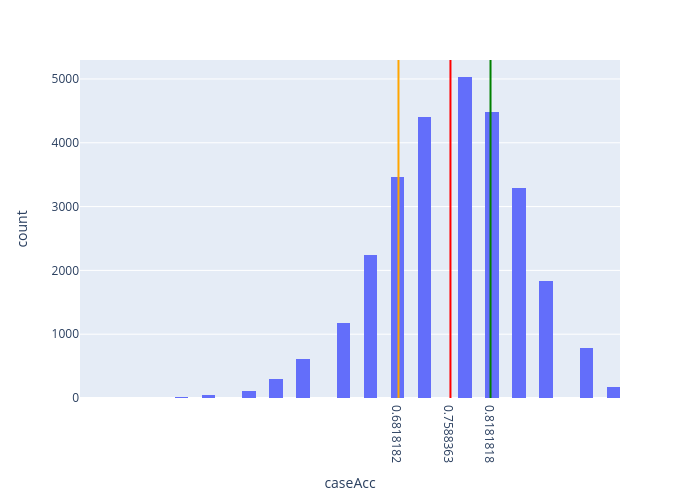

In [189]:
#| label: Subset accuracy distribution for 1 model per part system
#| fig-cap: "Red line for mean, Green line for 75% quantile and Orange line for 25% quantile"
img_bytes = fig.to_image(format="png")
display.Image(img_bytes)

In [190]:
fig = px.bar(x=["subset_acc", "less_than_3_item_error_acc", "exact_match_acc"], y=[avgSubsetAcc, threeCaseError, exactMatchAcc], text_auto=True)

fig.update_layout(
    title=go.layout.Title(
        text=f"Case Performance",
        x=0.5
    ))
# fig.show()

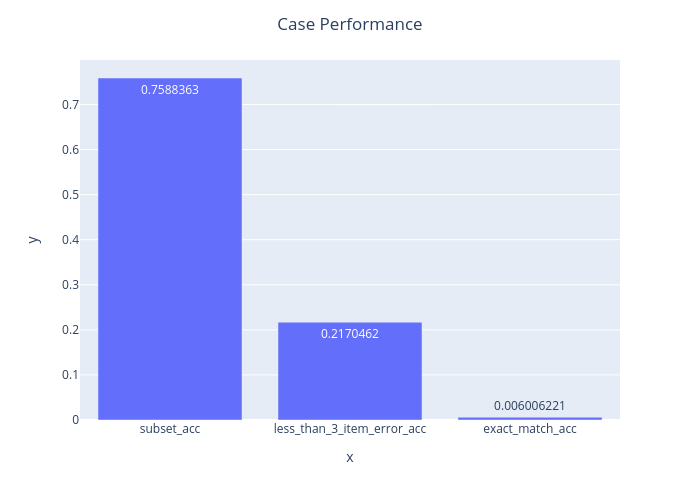

In [191]:
#| label: Models performance per case 2   
#| fig-cap: "Subset Accuracy is around 75%"
img_bytes = fig.to_image(format="png")
display.Image(img_bytes)

In [192]:
multilabelCaseDf = pd.read_csv("../tmp/multilabel_result.csv")


In [193]:
meanVal = multilabelCaseDf["subset_acc"].mean()
# medianVal = multilabelCaseDf["subset_acc"].median()
firstQuarter = np.quantile(multilabelCaseDf["subset_acc"].values, 0.25)
thirdQuarter = np.quantile(multilabelCaseDf["subset_acc"].values, 0.75)

fig = px.histogram(multilabelCaseDf, x="subset_acc")
fig.add_vline(x=meanVal, line_width=2, line_color="red")
# fig.add_vline(x=medianVal, line_width=2, line_color="blue")
fig.add_vline(x=firstQuarter, line_width=2, line_color="orange")
fig.add_vline(x=thirdQuarter, line_width=2, line_color="green")

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [meanVal, firstQuarter, thirdQuarter],
    )
)
# fig.show()

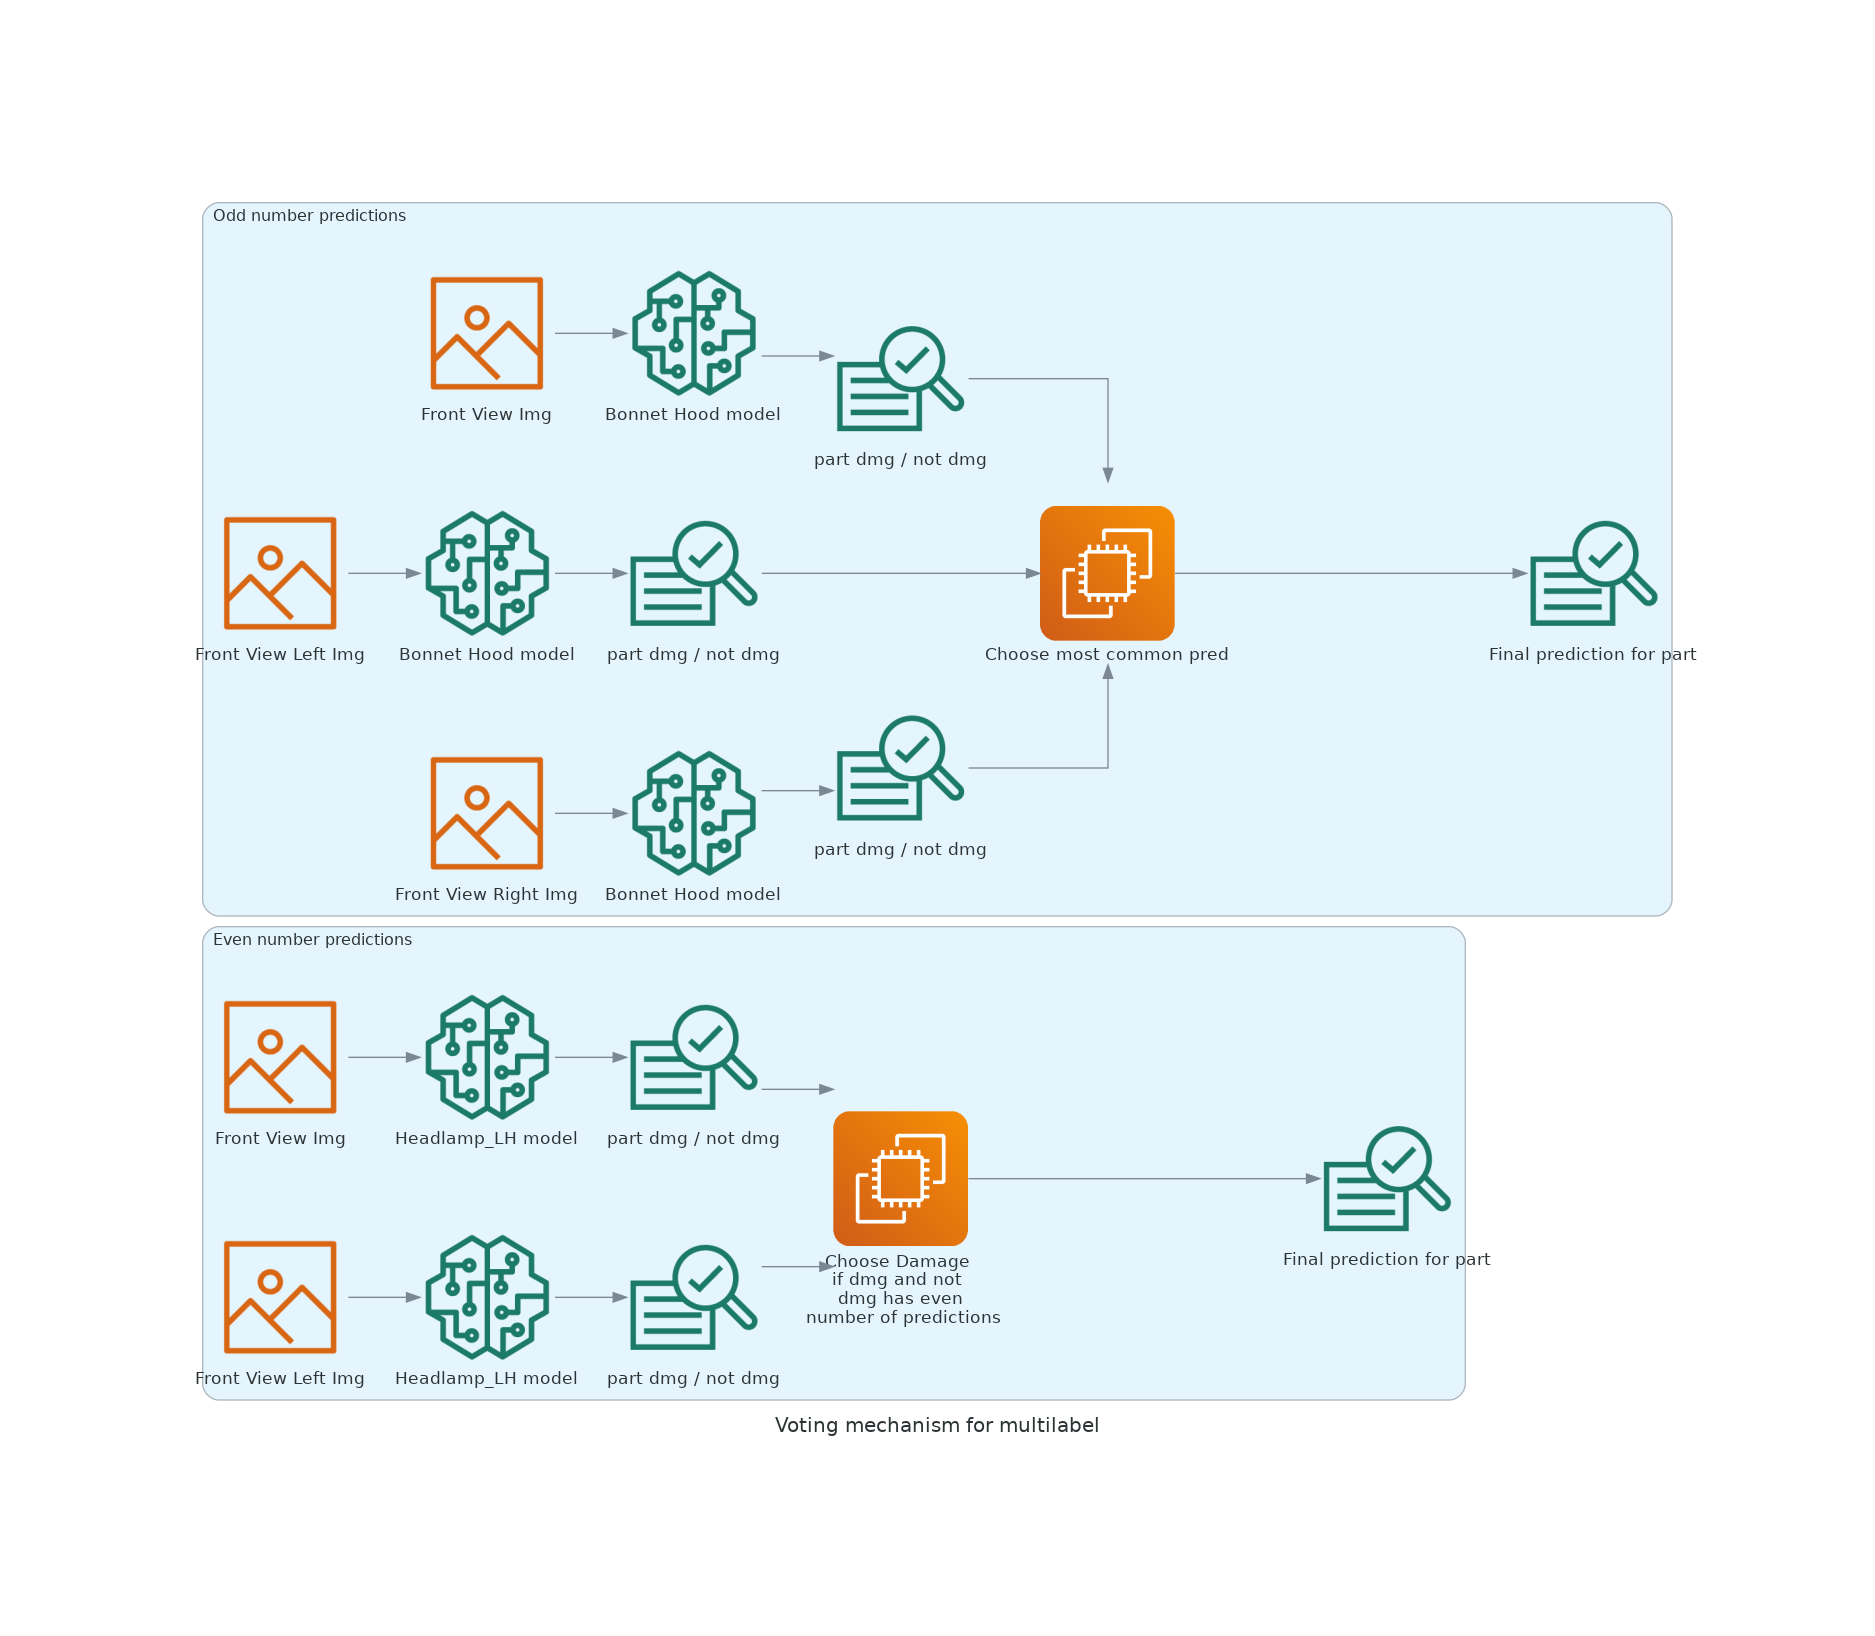

In [194]:
from diagrams.aws.compute import EC2ContainerRegistryImage
from diagrams.aws.ml import SagemakerModel, SagemakerTrainingJob


with Diagram(name="Voting mechanism for multilabel", show=False, direction="LR") as fig:
    with Cluster(label="Even number predictions") as c1:
            input1 = EC2ContainerRegistryImage(f"Front View Img") 
            m1 = SagemakerModel("Headlamp_LH model")
            o1 = SagemakerTrainingJob("part dmg / not dmg")
            input2 = EC2ContainerRegistryImage(f"Front View Left Img") 
            m2 = SagemakerModel("Headlamp_LH model")
            o2 = SagemakerTrainingJob("part dmg / not dmg")
            EnsembleSys = EC2("Choose Damage \nif dmg and not \ndmg has even\n number of predictions")
            finalOutput = SagemakerTrainingJob("Final prediction for part")

            input1 >> m1 >> o1 >>EnsembleSys
            input2 >> m2 >> o2 >>EnsembleSys
            EnsembleSys >>Edge(minlen="3") >> finalOutput
    with Cluster(label="Odd number predictions") as c1:
            input1 = EC2ContainerRegistryImage(f"Front View Img") 
            m1 = SagemakerModel("Bonnet Hood model")
            o1 = SagemakerTrainingJob("part dmg / not dmg")
            input2 = EC2ContainerRegistryImage(f"Front View Left Img") 
            m2 = SagemakerModel("Bonnet Hood model")
            o2 = SagemakerTrainingJob("part dmg / not dmg")
            input3 = EC2ContainerRegistryImage(f"Front View Right Img") 
            m3 = SagemakerModel("Bonnet Hood model")
            o3 = SagemakerTrainingJob("part dmg / not dmg")
            EnsembleSys = EC2("Choose most common pred")
            finalOutput = SagemakerTrainingJob("Final prediction for part")

            input1 >> m1 >> o1 >>EnsembleSys
            input2 >> m2 >> o2 >>Edge(minlen="2")>>EnsembleSys
            input3 >> m3 >> o3 >>EnsembleSys

            EnsembleSys >>Edge(minlen="3") >> finalOutput

fig

In [195]:
#| title: Subset Accuracy distribution for multilabel system
#| fig-cap: "Subset Accuracy is around 86%, which is a significant improvement"
img_bytes = fig.to_image(format="png")
display.Image(img_bytes)

AttributeError: 'Diagram' object has no attribute 'to_image'

In [ ]:

avgSubsetAcc = multilabelCaseDf["subset_acc"].mean()
ThreeErrorCase = multilabelCaseDf[multilabelCaseDf["correct"] >= 19]
threeCaseError = len(ThreeErrorCase) / len(multilabelCaseDf)
exactMatchAcc = len(multilabelCaseDf[multilabelCaseDf["correct"] == 22]) / len(multilabelCaseDf)

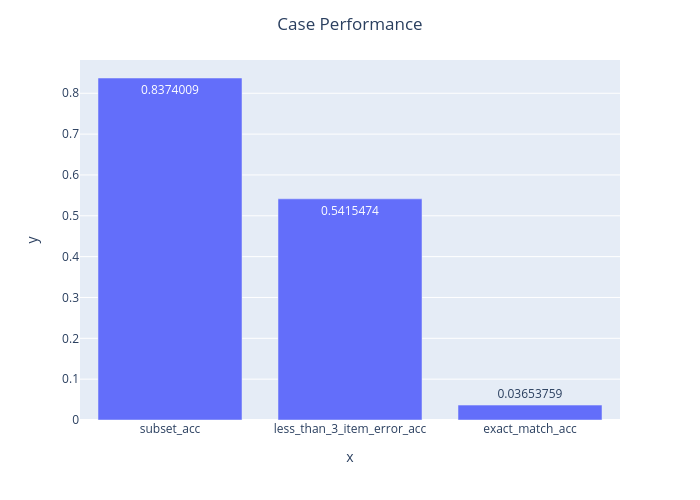

In [ ]:
fig = px.bar(x=["subset_acc", "less_than_3_item_error_acc", "exact_match_acc"], y=[avgSubsetAcc, threeCaseError, exactMatchAcc], text_auto=True)

fig.update_layout(
    title=go.layout.Title(
        text=f"Case Performance",
        x=0.5
    ))
#| label: Models performance for multilabel system
#| fig-cap: "Less than 3 item error rate increases significantly"
img_bytes = fig.to_image(format="png")
display.Image(img_bytes)
# fig.show()

In [ ]:
multilabelPartDf = pd.read_csv("/home/alextay96/Desktop/new_workspace/DLDataPipeline/tmp/multilabel_breakdown.csv")

In [ ]:
def genVisMulitlabel(multilabelPartDf, metricName):
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=multilabelPartDf["part"], y=multilabelPartDf[metricName],
        text = multilabelPartDf[metricName]
        ))
    avgVal = multilabelPartDf[metricName].mean()
    fig.add_hline(y=avgVal, line_width=2, line_color="red")
    fig.update_layout(
        yaxis = dict(
            tickmode = 'array',
            tickvals = [np.format_float_positional(avgVal, 2), 0.3, 0.8],
        )
    )
    fig.update_layout(
            title=go.layout.Title(
                text=f"{metricName}",
                x=0.5
            ))
    
    # fig.show()
    img_bytes = fig.to_image(format="png")
    return display.Image(img_bytes)

    # return fig

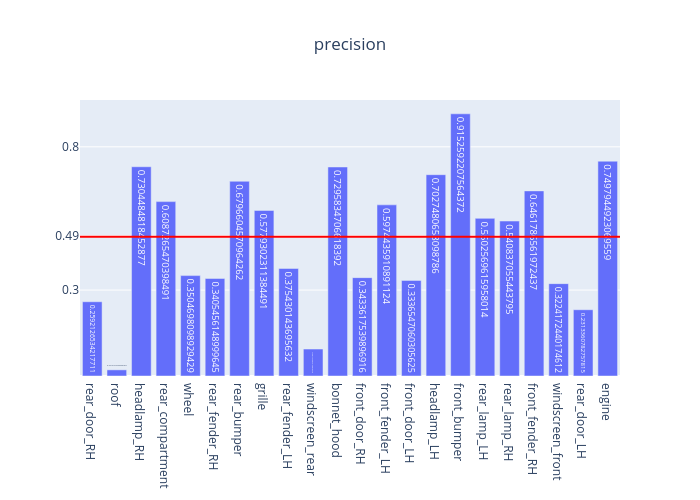

In [ ]:
#| label: Multilabel system precision
#| fig-cap: "Precision is low for multilabel system"
metric = "precision"
genVisMulitlabel(multilabelPartDf, metric)
# img_bytes = fig.to_image(format="png")
# display.Image(img_bytes)


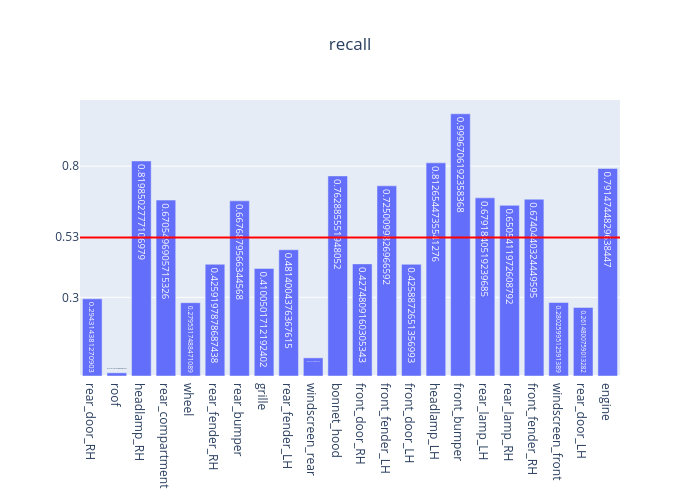

In [ ]:
#| label: Multilabel system recall
#| fig-cap: "Recall is low for multilabel system"
metric = "recall"
genVisMulitlabel(multilabelPartDf, metric)

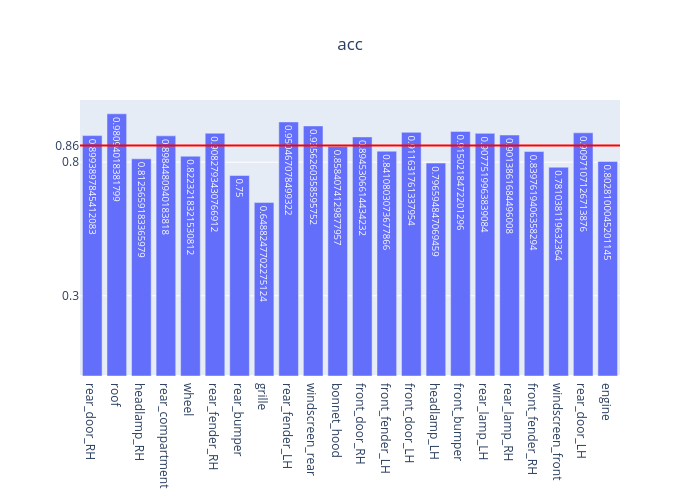

In [ ]:
#| label: Multilabel system accuracy
#| fig-cap: "Accuracy for each part"

metric = "acc"
genVisMulitlabel(multilabelPartDf, metric)

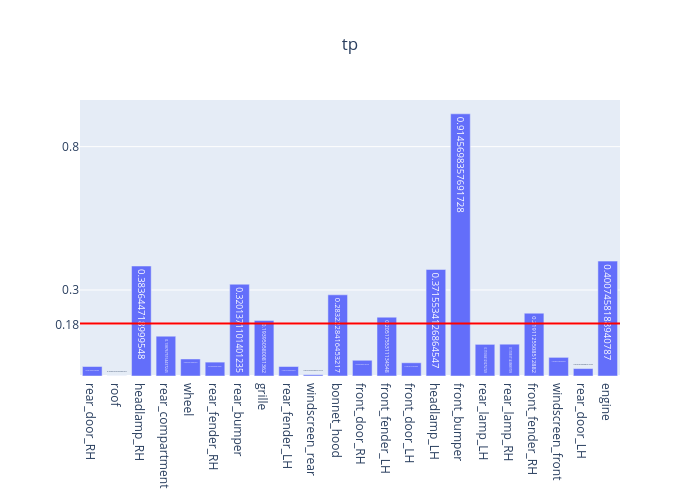

In [ ]:
#| label: Multilabel system True Positive By Parts
#| fig-cap: "TP is much worse than pervious systems due to severe label imbalance"
metric = "tp"
genVisMulitlabel(multilabelPartDf, metric)

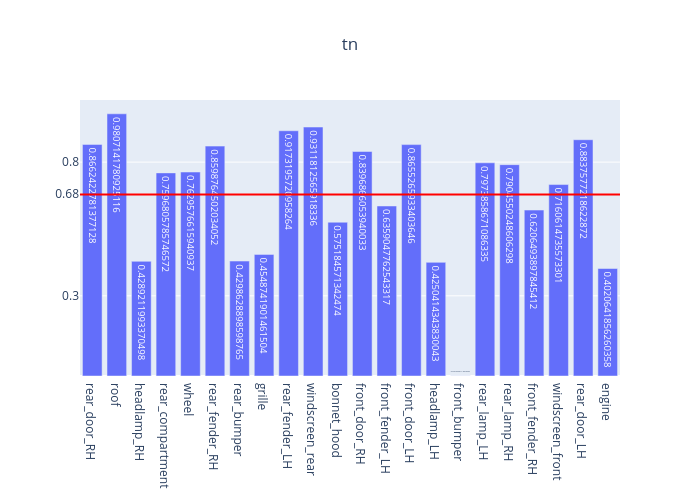

In [ ]:
#| label: Multilabel system True Negative By Parts
#| fig-cap: "TN is close to expected value"
metric = "tn"
genVisMulitlabel(multilabelPartDf, metric)

In [ ]:
multilabelPartPosWeightDf = pd.read_csv("../tmp/multilabel_breakdown_pos_weight.csv")


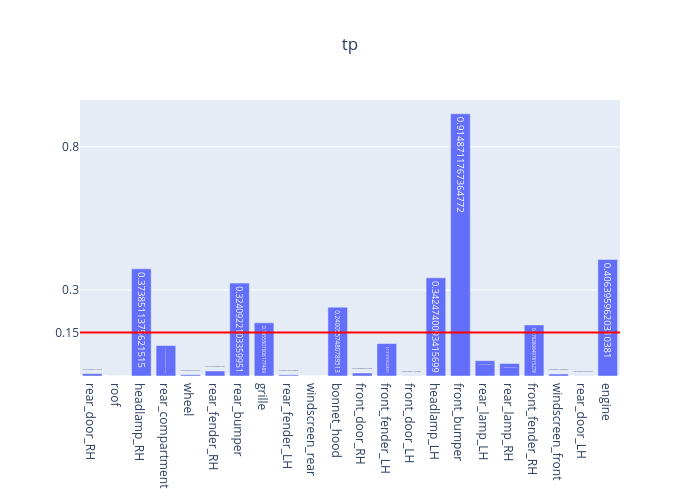

In [ ]:
#| label: Multilabel system True Positive By Parts With Positive weight
#| fig-cap: "TP is much worse than pervious systems due to severe label imbalance"
metric = "tp"
genVisMulitlabel(multilabelPartPosWeightDf, metric)

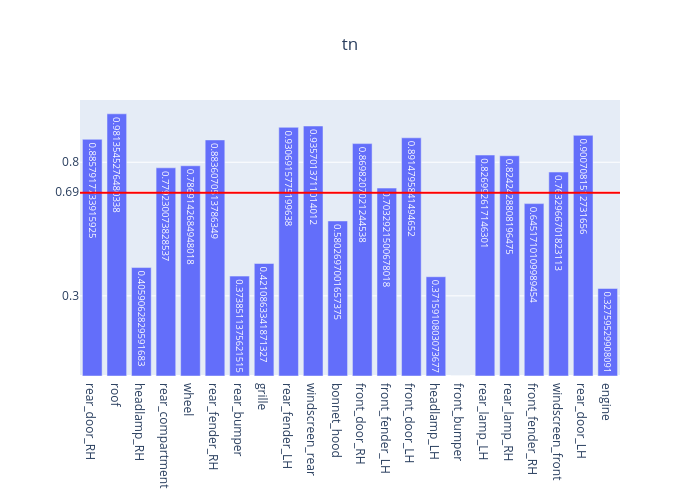

In [ ]:
#| label: Multilabel system True Negative By Parts With Positive weight
#| fig-cap: "tn"
metric = "tn"
genVisMulitlabel(multilabelPartPosWeightDf, metric)

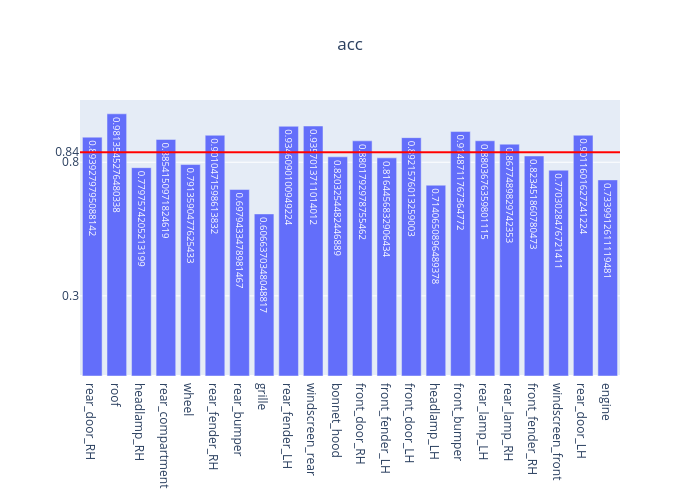

In [ ]:
#| label: Multilabel system accuracy with pos weight
#| fig-cap: "Accuracy for each part"

metric = "acc"
genVisMulitlabel(multilabelPartPosWeightDf, metric)

In [ ]:
multilabelCasePosWeightDf = pd.read_csv("../tmp/multilabel_result_pos_weight.csv")


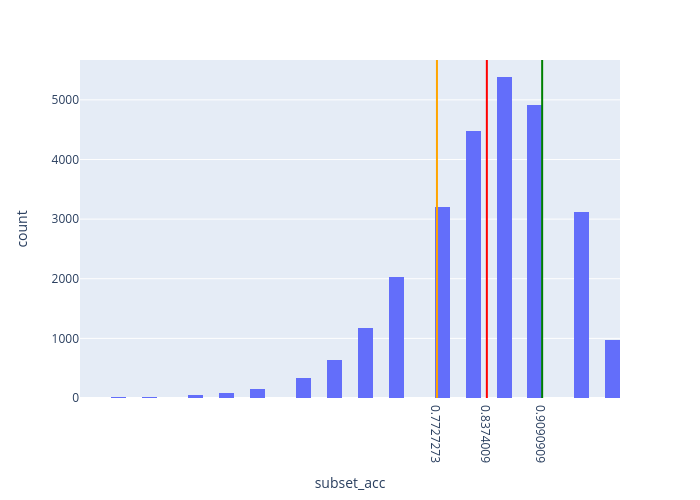

In [ ]:
#| title: Subset Accuracy distribution for multilabel system with pos weight
#| fig-cap: "Subset Accuracy is around 83%, which is slightly lower than previous system"
meanVal = multilabelCasePosWeightDf["subset_acc"].mean()
# medianVal = multilabelCaseDf["subset_acc"].median()
firstQuarter = np.quantile(multilabelCasePosWeightDf["subset_acc"].values, 0.25)
thirdQuarter = np.quantile(multilabelCasePosWeightDf["subset_acc"].values, 0.75)

fig = px.histogram(multilabelCasePosWeightDf, x="subset_acc")
fig.add_vline(x=meanVal, line_width=2, line_color="red")
# fig.add_vline(x=medianVal, line_width=2, line_color="blue")
fig.add_vline(x=firstQuarter, line_width=2, line_color="orange")
fig.add_vline(x=thirdQuarter, line_width=2, line_color="green")

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [meanVal, firstQuarter, thirdQuarter],
    )
)

img_bytes = fig.to_image(format="png")
display.Image(img_bytes)

In [ ]:

avgSubsetAcc = multilabelCasePosWeightDf["subset_acc"].mean()
ThreeErrorCase = multilabelCasePosWeightDf[multilabelCasePosWeightDf["correct"] >= 19]
threeCaseError = len(ThreeErrorCase) / len(multilabelCasePosWeightDf)
exactMatchAcc = len(multilabelCasePosWeightDf[multilabelCasePosWeightDf["correct"] == 22]) / len(multilabelCasePosWeightDf)

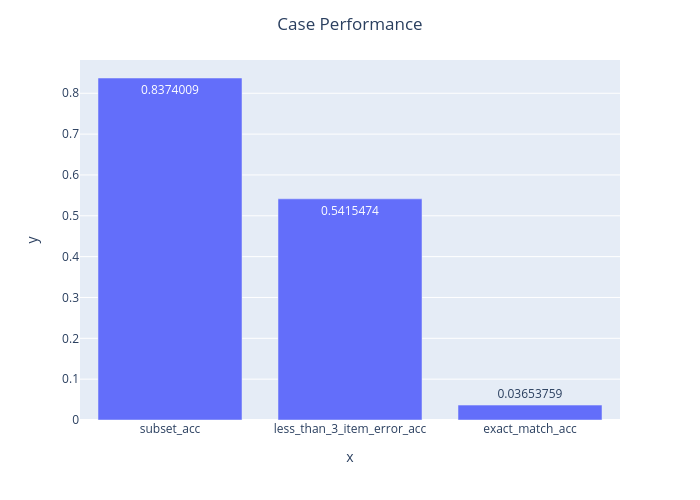

In [ ]:
fig = px.bar(x=["subset_acc", "less_than_3_item_error_acc", "exact_match_acc"], y=[avgSubsetAcc, threeCaseError, exactMatchAcc], text_auto=True)

fig.update_layout(
    title=go.layout.Title(
        text=f"Case Performance",
        x=0.5
    ))
#| label: Models performance for multilabel system
#| fig-cap: "Less than 3 item error rate increases significantly"
img_bytes = fig.to_image(format="png")
display.Image(img_bytes)